In [3]:
#Importación de librerías
try:
  
  #Para usar colab
  from google.colab import drive
  drive.mount('/content/drive')
  
  import numpy as np
  import pandas as pd
  
except:
  
  import numpy as np
  import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

import seaborn as sns
sns.set()

In [4]:
#Lectura de datos
try:
  #Caso en que se este usando jupyter notebooks
  data_pulsar = pd.read_csv('HTRU_2_con_header.csv')
except:
  #Caso en que se use colab, cambiar directorio de acuerdo al drive
  dir_str ='drive/My Drive/CURSOS - MAESTRIA/APRENDIZAJE AUTOMÁTICO/MACHINE LEARNING - PROYECTO/ML_PULSAR_CLASSIFICATION_PROJECT/PREPROCESAMIENTO DE DATA/HTRU_2_sin_header.csv'
  #Se definen  los headers
  head = ['mean_IP', 'std_IP','kurt_IP','skew_IP','mean_DM', 'std_DM','kurt_DM','skew_DM','is_pulsar']
  #Lectura de la data
  data_pulsar = pd.read_csv(dir_str,header=None, names=head)

# Aplicación de Algoritmos (Data Cruda)

In [5]:
from sklearn.model_selection import train_test_split

#Partición de la data cruda
X = data_pulsar.drop(columns=["is_pulsar"])
y = data_pulsar["is_pulsar"]

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=0)

##1° Algorithm Test: Random Forest

E:\INSTALACIONES\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.02201774564574433


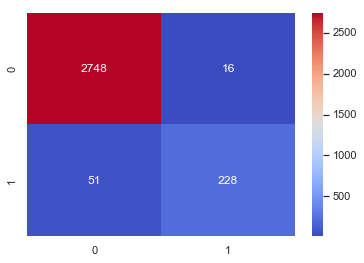

In [6]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_val)

from sklearn.metrics import mean_squared_error
RF_MSE =mean_squared_error(y_val, RF_y_pred)  
print(RF_MSE)

from sklearn.metrics import confusion_matrix
RF_conf = confusion_matrix(y_val, RF_y_pred)

sns.heatmap(RF_conf,annot=True, fmt="d", cmap="coolwarm");

In [7]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, RF_y_pred)
accuracy

0.9779822543542557

In [8]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, RF_y_pred)
precision

0.9344262295081968

In [9]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, RF_y_pred)
recall

0.8172043010752689

In [10]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, RF_y_pred)
f1score

0.8718929254302105

##2° Algorithm Test: SVM

0.09069996713769307


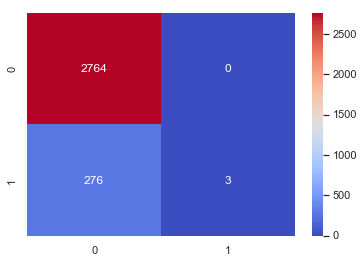

In [11]:
from sklearn.svm import SVC

SVM_model = SVC(gamma='auto',kernel='rbf')
SVM_model.fit(X_train, y_train) 
SVM_y_pred = SVM_model.predict(X_val)

from sklearn.metrics import mean_squared_error
SVM_MSE = mean_squared_error(y_val, SVM_y_pred)  
print(SVM_MSE)

from sklearn.metrics import confusion_matrix
SVM_conf = confusion_matrix(y_val, SVM_y_pred)

sns.heatmap(SVM_conf,annot=True, fmt="d", cmap="coolwarm");

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, SVM_y_pred)
accuracy

0.909300032862307

In [13]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, SVM_y_pred)
precision

1.0

In [14]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, SVM_y_pred)
recall

0.010752688172043012

In [15]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, SVM_y_pred)
f1score

0.021276595744680854

##3° Algorithm Test: KNN

0.026947091685836345


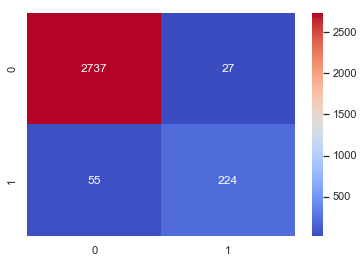

In [16]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(X_train, y_train) 
KNN_y_pred = KNN_model.predict(X_val)

from sklearn.metrics import mean_squared_error
KNN_MSE = mean_squared_error(y_val, KNN_y_pred)  
print(KNN_MSE)

from sklearn.metrics import confusion_matrix
KNN_conf = confusion_matrix(y_val, KNN_y_pred)

sns.heatmap(KNN_conf,annot=True, fmt="d", cmap="coolwarm");

In [17]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, KNN_y_pred)
accuracy

0.9730529083141637

In [18]:
from sklearn.metrics import precision_score
precision = precision_score(y_val, KNN_y_pred)
precision

0.8924302788844621

In [19]:
from sklearn.metrics import recall_score
recall = recall_score(y_val, KNN_y_pred)
recall

0.8028673835125448

In [20]:
from sklearn.metrics import f1_score
f1score = f1_score(y_val, KNN_y_pred)
f1score

0.8452830188679245

# Preprocesamiento de la Data

## Escalamiento de la data

In [21]:
#Escalamiento 
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(data_pulsar)
data_pulsar_scaled = pd.DataFrame(scaler.transform(data_pulsar), columns = head)
data_pulsar_scaled.describe()

#Partición de la data escalada
X_sca = data_pulsar_scaled.drop(columns=["is_pulsar"])
y_sca = data_pulsar_scaled["is_pulsar"]

X_trainval_sca, X_test_sca, y_trainval_sca, y_test_sca = train_test_split(X_sca, y_sca, test_size=0.15, random_state=0) #random_state = 0, para mantener la particion
X_train_sca, X_val_sca, y_train_sca, y_val_sca = train_test_split(X_trainval_sca, y_trainval_sca, test_size=0.2, random_state=0)


## Aplicación de SVMSMOTE

In [22]:
#Antes de aplicar SMOTE
y_train_sca.value_counts()

0.0    11020
1.0     1150
Name: is_pulsar, dtype: int64

In [23]:
#https://imbalanced-learn.readthedocs.io/en/latest/generated/imblearn.over_sampling.SVMSMOTE.html#r88acb9955f91-2
from collections import Counter
from imblearn.over_sampling import SVMSMOTE
smt = SVMSMOTE()
X_sm_train, y_sm_train = smt.fit_resample(X_train_sca, y_train_sca)


ModuleNotFoundError: No module named 'imblearn'

In [ ]:
print('Tamaño de la data remuestrada: %s' % Counter(y_sm_train))